### Predict The Flight Ticket Price 

In [521]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [522]:
data_train=pd.read_excel('data/Data_Train.xlsx')
data_test=pd.read_excel('data/Test_set.xlsx')

In [523]:
data_train.shape

(10683, 11)

In [524]:
data_test.shape

(2671, 10)

In [525]:
data=data_train.append(data_test,sort=False)

In [526]:
#Load the data
#data=pd.read_excel('data/Data_Train.xlsx')

In [527]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [528]:
data.shape

(13354, 11)

In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### Feature Engineering

In [530]:
#Get day,month and year from Date_of_Journey column
data['Day']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [531]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [532]:
#Drop Date_of_Journey column
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Day              13354 non-null  object 
 11  Month            13354 non-null  object 
 12  Year             13354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [534]:
#We can find that Day,Month and Year column data type is object, we should convert them to integer
data['Day']=data['Day'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Day              13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


In [535]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [536]:
#We can get dep hour and dept min from Dep_Time
data['Dep_hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_minutes']=data['Dep_Time'].str.split(':').str[1]
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50


In [537]:
#Remove the Dep_Time column
data.drop('Dep_Time',axis=1,inplace=True)

In [538]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50


In [539]:
# The Arrival_Time feature have day component too which we don't need as we have that seperately so we can update this
# column to have only time
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882.0,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50


In [540]:
#Get arrival hour and minute from Arrival_Time feature and drop Arrival_Time feateure
data['Arrival_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_minutes']=data['Arrival_Time'].str.split(':').str[1]
data.drop('Arrival_Time',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


In [541]:
#Check if Total_Stops have any null
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,09,45,09,25


In [542]:
#We find that there is one null so we have replace with 2 stops as the duration is very long
data['Total_Stops'].fillna('2 stops',inplace=True)

In [543]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes


In [544]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


In [545]:
# The 'Total_Stops' feature can be updated with 0-no stop, 1- 1 stop, 2-2 stops as categorical feature

In [546]:
data['Total_Stops'].replace('non-stop',0,inplace=True)
data['Total_Stops'].replace('1 stop',1,inplace=True)
data['Total_Stops'].replace('2 stops',2,inplace=True)
data['Total_Stops'].replace('3 stops',3,inplace=True)
data['Total_Stops'].replace('4 stops',4,inplace=True)

In [547]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35


In [548]:
#Convert Total_Stops to integer column
data['Total_Stops']=data['Total_Stops'].astype(int)

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13354 non-null  int32  
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Dep_hour         13354 non-null  object 
 12  Dep_minutes      13354 non-null  object 
 13  Arrival_hour     13354 non-null  object 
 14  Arrival_minutes  13354 non-null  object 
dtypes: float64(1), int32(4), object(10)
memory usage: 1.4+ MB


In [550]:
#Convert Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes to int column
data['Arrival_hour']=data['Arrival_hour'].astype(int)
data['Arrival_minutes']=data['Arrival_minutes'].astype(int)
data['Dep_hour']=data['Dep_hour'].astype(int)
data['Dep_minutes']=data['Dep_minutes'].astype(int)

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13354 non-null  int32  
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Dep_hour         13354 non-null  int32  
 12  Dep_minutes      13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_minutes  13354 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.2+ MB


In [552]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35


In [553]:
#We can extract the all route info from 'Route' column 
data['Route1']=data['Route'].str.split('→ ').str[0]
data['Route2']=data['Route'].str.split('→ ').str[1]
data['Route3']=data['Route'].str.split('→ ').str[2]
data['Route4']=data['Route'].str.split('→ ').str[3]
data['Route5']=data['Route'].str.split('→ ').str[4]

In [554]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [555]:
#Replace route NaN values to None
data['Route1'].fillna('None',inplace=True)
data['Route2'].fillna('None',inplace=True)
data['Route3'].fillna('None',inplace=True)
data['Route4'].fillna('None',inplace=True)
data['Route5'].fillna('None',inplace=True)

In [556]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35,BLR,NAG,DEL,None,None


In [557]:
#Extract into from Duration 
data['Duration_hour']=data['Duration'].str.split(' ').str[0]
data['Duration_minutes']=data['Duration'].str.split(' ').str[1]

In [558]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,...,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,20,1,10,BLR,DEL,None,None,None,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,50,13,15,CCU,IXR,BBI,BLR,None,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,4,25,DEL,LKO,BOM,COK,None,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,5,23,30,CCU,NAG,BLR,None,None,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,50,21,35,BLR,NAG,DEL,None,None,4h,45m


In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Duration          13354 non-null  object 
 5   Total_Stops       13354 non-null  int32  
 6   Additional_Info   13354 non-null  object 
 7   Price             10683 non-null  float64
 8   Day               13354 non-null  int32  
 9   Month             13354 non-null  int32  
 10  Year              13354 non-null  int32  
 11  Dep_hour          13354 non-null  int32  
 12  Dep_minutes       13354 non-null  int32  
 13  Arrival_hour      13354 non-null  int32  
 14  Arrival_minutes   13354 non-null  int32  
 15  Route1            13354 non-null  object 
 16  Route2            13354 non-null  object 

In [560]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,...,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,20,1,10,BLR,DEL,None,None,None,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,50,13,15,CCU,IXR,BBI,BLR,None,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,4,25,DEL,LKO,BOM,COK,None,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,5,23,30,CCU,NAG,BLR,None,None,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,50,21,35,BLR,NAG,DEL,None,None,4h,45m


In [561]:
data['Duration_minutes'].unique()

array(['50m', '25m', nan, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [562]:
data['Duration_hour'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [563]:
data['Duration_hour'].replace('5m','5h',inplace=True,regex=True)

In [564]:
#Remove h from Duration_hour and m from Duration_minutes
data['Duration_hour'].replace('h','',inplace=True,regex=True)
data['Duration_minutes'].replace('m','',inplace=True,regex=True)

In [565]:
#fill NaN from Duration_hour and Duration_minutes to 0
data['Duration_hour'].fillna(0,inplace=True)
data['Duration_minutes'].fillna(0,inplace=True)

In [566]:
data['Duration_hour']=data['Duration_hour'].astype(int)
data['Duration_minutes']=data['Duration_minutes'].astype(int)

In [567]:
#Lets drop Duration as we have extractced info from it.
data.drop('Duration',axis=1,inplace=True)

In [568]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,...,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,...,20,1,10,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,...,50,13,15,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,...,25,4,25,DEL,LKO,BOM,COK,None,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,...,5,23,30,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,1,3,2019,...,50,21,35,BLR,NAG,DEL,None,None,4,45


In [569]:
#We can drop Route column too
data.drop('Route',axis=1,inplace=True)

In [570]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Total_Stops       13354 non-null  int32  
 4   Additional_Info   13354 non-null  object 
 5   Price             10683 non-null  float64
 6   Day               13354 non-null  int32  
 7   Month             13354 non-null  int32  
 8   Year              13354 non-null  int32  
 9   Dep_hour          13354 non-null  int32  
 10  Dep_minutes       13354 non-null  int32  
 11  Arrival_hour      13354 non-null  int32  
 12  Arrival_minutes   13354 non-null  int32  
 13  Route1            13354 non-null  object 
 14  Route2            13354 non-null  object 
 15  Route3            13354 non-null  object 
 16  Route4            13354 non-null  object 

In [571]:
#Now we can label encode the categorical features and label info matters for airline pricing
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['Airline']=encoder.fit_transform(data['Airline'])

In [572]:
encoder.classes_

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [573]:
data['Source']=encoder.fit_transform(data['Source'])

In [574]:
encoder.classes_

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [575]:
data['Destination']=encoder.fit_transform(data['Destination'])
encoder.classes_

array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype=object)

In [576]:
data['Additional_Info']=encoder.fit_transform(data['Additional_Info'])
encoder.classes_

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

In [577]:
data['Route1']=encoder.fit_transform(data['Route1'])
encoder.classes_

array(['BLR ', 'BOM ', 'CCU ', 'DEL ', 'MAA ', 'None'], dtype=object)

In [578]:
data['Route2']=encoder.fit_transform(data['Route2'])
encoder.classes_

array(['AMD ', 'ATQ ', 'BBI ', 'BDQ ', 'BHO ', 'BLR', 'BLR ', 'BOM ',
       'CCU', 'CCU ', 'COK', 'COK ', 'DED ', 'DEL', 'DEL ', 'GAU ',
       'GOI ', 'GWL ', 'HBX ', 'HYD', 'HYD ', 'IDR ', 'IXA ', 'IXB ',
       'IXC ', 'IXR ', 'IXU ', 'IXZ ', 'JAI ', 'JDH ', 'JLR ', 'KNU ',
       'LKO ', 'MAA ', 'NAG ', 'NDC ', 'None', 'PAT ', 'PNQ ', 'RPR ',
       'STV ', 'TRV ', 'UDR ', 'VGA ', 'VNS ', 'VTZ '], dtype=object)

In [579]:
data['Route3']=encoder.fit_transform(data['Route3'])
encoder.classes_

array(['AMD ', 'BBI ', 'BHO ', 'BLR', 'BOM ', 'CCU ', 'COK', 'COK ',
       'DEL', 'DEL ', 'GAU ', 'GOI ', 'HBX ', 'HYD', 'HYD ', 'IDR ',
       'IMF ', 'ISK ', 'IXC ', 'IXR ', 'JAI ', 'JDH ', 'MAA ', 'NAG ',
       'None', 'PNQ ', 'TIR ', 'TRV ', 'UDR ', 'VGA ', 'VTZ '],
      dtype=object)

In [580]:
data['Route4']=encoder.fit_transform(data['Route4'])
encoder.classes_

array(['AMD ', 'BBI ', 'BHO ', 'BLR', 'BOM ', 'COK', 'DEL', 'DEL ',
       'GWL ', 'HYD', 'HYD ', 'NAG ', 'None', 'TRV '], dtype=object)

In [581]:
data['Route5']=encoder.fit_transform(data['Route5'])
encoder.classes_

array(['BLR', 'COK', 'DEL', 'HYD', 'None', 'VGA '], dtype=object)

In [582]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
0,3,0,5,0,8,3897.0,24,3,2019,22,20,1,10,0,13,24,12,4,2,50
1,1,3,0,2,8,7662.0,1,5,2019,5,50,13,15,2,25,1,3,4,7,25
2,4,2,1,2,8,13882.0,9,6,2019,9,25,4,25,3,32,4,5,4,19,0
3,3,3,0,1,8,6218.0,12,5,2019,18,5,23,30,2,34,3,12,4,5,25
4,3,0,5,1,8,13302.0,1,3,2019,16,50,21,35,0,34,8,12,4,4,45


### Select best features which can help predict the price.

In [583]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [584]:
data_train=data[0:10683]
data_test=data[10683:]

In [585]:
big_data=data.copy()
data=data_train

In [586]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [587]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
0,3,0,5,0,8,24,3,2019,22,20,1,10,0,13,24,12,4,2,50
1,1,3,0,2,8,1,5,2019,5,50,13,15,2,25,1,3,4,7,25
2,4,2,1,2,8,9,6,2019,9,25,4,25,3,32,4,5,4,19,0
3,3,3,0,1,8,12,5,2019,18,5,23,30,2,34,3,12,4,5,25
4,3,0,5,1,8,1,3,2019,16,50,21,35,0,34,8,12,4,4,45


In [588]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [589]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [590]:
feature_model=SelectFromModel(Lasso(alpha=0.001,random_state=42))

In [591]:
feature_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [592]:
feature_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [593]:
#In above we are getting two features as false, lets get that feature list

In [594]:
selected_features=X_train.columns[(feature_model.get_support())]

In [595]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day', 'Month', 'Dep_hour', 'Dep_minutes', 'Arrival_hour',
       'Arrival_minutes', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Duration_hour', 'Duration_minutes'],
      dtype='object')

In [596]:
X_train['Duration_hour'].unique()

array([10, 25,  6, 12, 26,  2,  1, 21, 22, 27,  3, 29, 23, 13, 14, 15,  9,
       24,  8, 11,  7,  5, 17, 19, 20,  4, 16, 18, 38, 28, 31, 37, 30, 32,
       34, 33, 36, 35, 47, 39, 42, 41])

In [597]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [598]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
8990,4,4,3,2,8,12,3,6,30,16,35,1,44,9,9,4,10,5
3684,4,2,1,1,5,9,5,11,30,12,35,3,7,6,12,4,25,5
1034,8,2,1,1,8,24,4,15,45,22,5,3,33,6,12,4,6,20
3909,6,2,1,1,8,21,3,12,50,1,35,3,7,6,12,4,12,45
3088,1,2,1,2,8,24,6,17,15,19,15,3,20,4,5,4,26,0


In [599]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
6076,4,3,0,1,5,18,5,5,45,18,15,2,7,3,12,4,12,30
3544,2,2,1,1,8,3,6,10,35,19,35,3,7,6,12,4,9,0
7313,4,3,0,1,8,1,5,14,5,19,50,2,7,3,12,4,5,45
5032,3,1,4,0,8,24,5,14,45,17,5,4,8,24,12,4,2,20
2483,4,2,1,1,5,21,5,22,50,4,25,3,7,6,12,4,5,35


In [600]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Route1,Route2,Route3,Route4,Route5,Duration_hour,Duration_minutes
8990,4,4,3,2,8,12,3,6,30,16,35,1,44,9,9,4,10,5
3684,4,2,1,1,5,9,5,11,30,12,35,3,7,6,12,4,25,5
1034,8,2,1,1,8,24,4,15,45,22,5,3,33,6,12,4,6,20
3909,6,2,1,1,8,21,3,12,50,1,35,3,7,6,12,4,12,45
3088,1,2,1,2,8,24,6,17,15,19,15,3,20,4,5,4,26,0


### Applying Machine Learning Algos

In [156]:
### RandomFores

In [157]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=['auto','sqrt']
#Max number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Mininum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#mininum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [158]:
#Create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [159]:
#Use the random grid to search for best parameter
from sklearn.ensemble import RandomForestRegressor
rfRegressor=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rfRegressor,param_distributions=random_grid,scoring='neg_mean_squared_error',
                             n_iter=50,cv=5,verbose=2,random_state=42,
                             return_train_score=True)

In [160]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  14.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  13.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  14.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  14.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  14.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_feature

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [161]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [162]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [601]:
rfRegressor=RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [602]:
rfRegressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [603]:
y_pred=rfRegressor.predict(X_test)

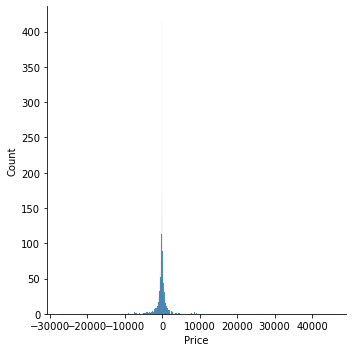

In [604]:
import seaborn as sns
sns.displot(y_test-y_pred)

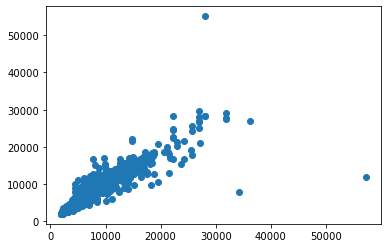

In [605]:
plt.scatter(y_test,y_pred)

In [606]:
from sklearn import metrics

print('R Square',np.sqrt(metrics.r2_score(y_test,y_pred)))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R Square 0.9237608640937882
MAE 662.6168067469713
MSE 3104031.408888443
RMSE 1761.8261573970467


In [607]:
np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean())

0.057834584030503816

### Creating the submission file

In [611]:
data_test.drop(['Price'],axis=1,inplace=True)

In [614]:
data_test.drop(['Year'],axis=1,inplace=True)

In [615]:
data_test_y_pred=rfRegressor.predict(data_test)

In [628]:
data_test_y_pred_df=pd.DataFrame(data_test_y_pred,columns=['Price'])

In [630]:
data_test_y_pred_df.to_excel('flight_price_submission.xlsx')

### Saving the rfRegressor model to disk

In [631]:
import pickle

In [632]:
# save the model to disk
filename = 'rfRegressor_model.pkl'
pickle.dump(rfRegressor, open(filename, 'wb'))

### XGBoost Regressor

In [346]:
import xgboost
from numpy import nan

In [321]:
#Number of Trees in XGBoost
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
learning_rate=[0.05,0.1,0.2,0.3,0.5,0.6]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [322]:
random_grid={'n_estimators':n_estimators,
             'learning_rate':learning_rate,
             'max_depth':max_depth,
             'subsample':subsample,
             'min_child_weight':min_child_weight}

In [323]:
xgb_regressor=xgboost.XGBRegressor()

In [331]:
xg_random=RandomizedSearchCV(estimator=xgb_regressor,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,random_state=42)

In [332]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  33.0s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  32.6s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  34.4s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  36.1s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  34.5s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  28.1s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  29.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  30.4s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=30, min_child_weight=6, n_estimators=200, subsample=0.7; total time=   5.8s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=6, n_estimators=200, subsample=0.7; total time=   6.1s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=6, n_estimators=200, subsample=0.7; total time=   5.8s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   7.8s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   7.3s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   7.9s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   6.7s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=200, subsample=0.7; total time=   6.7s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=800, subsampl

[CV] END learning_rate=0.3, max_depth=25, min_child_weight=7, n_estimators=500, subsample=0.6; total time=  15.6s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.7; total time=  46.2s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.7; total time=  44.4s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.7; total time=  38.8s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.7; total time=  42.9s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.7; total time=  39.1s
[CV] END learning_rate=0.5, max_depth=15, min_child_weight=7, n_estimators=700, subsample=0.6; total time=  14.4s
[CV] END learning_rate=0.5, max_depth=15, min_child_weight=7, n_estimators=700, subsample=0.6; total time=  14.5s
[CV] END learning_rate=0.5, max_depth=15, min_child_weight=7, n_estimators=700, subsampl

[CV] END learning_rate=0.1, max_depth=25, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=  34.6s
[CV] END learning_rate=0.1, max_depth=25, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=  36.9s
[CV] END learning_rate=0.1, max_depth=25, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=  35.8s
[CV] END learning_rate=0.1, max_depth=25, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=  38.5s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   5.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   4.5s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   5.7s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.6; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=300, subs

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [348]:
xg_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [349]:
xgb_regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [633]:
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [634]:
y_pred=xgb_regressor.predict(X_test)

In [635]:
print('R Square',np.sqrt(metrics.r2_score(y_test,y_pred)))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R Square 0.9486195571142558
MAE 611.7612636567948
MSE 2118956.088011436
RMSE 1455.6634528665738
